Titanic Project

Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [21]:
import pandas as pd #importing necessary libraries
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler #necessary libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split   #to train, test, split 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score



In [22]:
import warnings
warnings.filterwarnings('ignore')  #importing warnings

In [23]:
pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")  #importing the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
df =pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [25]:
type(df) #checking type of dataframe

pandas.core.frame.DataFrame

In [26]:
df  #printing dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df.head() #printing & checking head of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.tail() #printing & checking tail of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [42]:
df.shape

(891, 8)

In [29]:
df.info()  #fetching details of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.describe()   #reviewing all the columns, understanding data through percentiles

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
type(df.columns) #checking type of dataframe

pandas.core.indexes.base.Index

In [32]:
df.columns  #checking column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
df.isnull().sum()  #checking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see the most relevant columns that might be related in finding the survival of a passenger are 

Thus we will drop the irrelevant columns like PassengerId, Name, Cabin and Ticket.

In [34]:
df = df.drop(columns = ['PassengerId'])
df = df.drop(columns = ['Name'])
df = df.drop(columns = ['Cabin'])
df = df.drop(columns = ['Ticket'])

In [35]:
df  #now our working dataset looks good, lets check for nulls

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [37]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Looks like the Age column has null values. Lets handle it with applying fill method using the mean of the column

In [38]:
df.fillna(value=df['Age'].mean(), inplace = True)   # method ='ffill' #limit=1

In [44]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

See all the nulls are gone. We are good to go!

In [41]:
df.shape  #checking the shape. 

(891, 8)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


We may now proceed to Data Visualization

Data Visualization

The dataframe had two types of data:-
    
Categorical Variable Analysis: Survived, sex, pclass, embarked, cabin, name, ticket, sibsp, parch.
    
Numerical Variable Analysis: Age, passengerid, fare.
    
We will try to visualize the categorical variables first.

Text(0.5, 1.0, 'Number of Pclass in each area')

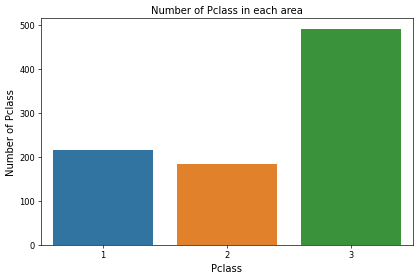

In [46]:
a = df["Pclass"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Pclass", fontsize = 12)
b.set_ylabel("Number of Pclass", fontsize = 12)
b.set_title("Number of Pclass in each area")

Text(0.5, 1.0, 'Number of Sex in each area')

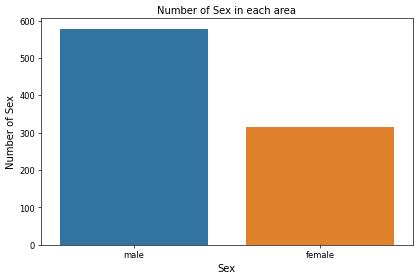

In [47]:
a = df["Sex"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Sex", fontsize = 12)
b.set_ylabel("Number of Sex", fontsize = 12)
b.set_title("Number of Sex in each area")

Text(0.5, 1.0, 'Number of SibSp in each area')

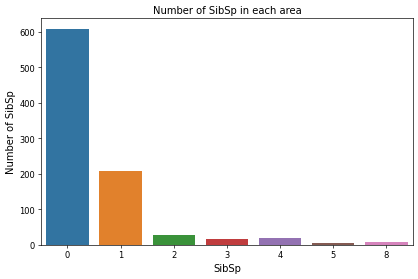

In [48]:
a = df["SibSp"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("SibSp", fontsize = 12)
b.set_ylabel("Number of SibSp", fontsize = 12)
b.set_title("Number of SibSp in each area")

Text(0.5, 1.0, 'Number of Parch in each area')

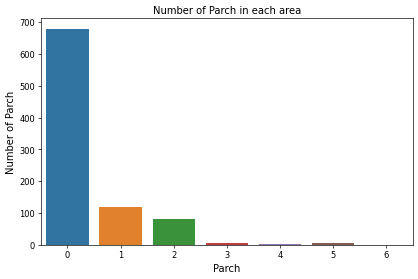

In [49]:
a = df["Parch"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Parch", fontsize = 12)
b.set_ylabel("Number of Parch", fontsize = 12)
b.set_title("Number of Parch in each area")

Text(0.5, 1.0, 'Number of Embarked in each area')

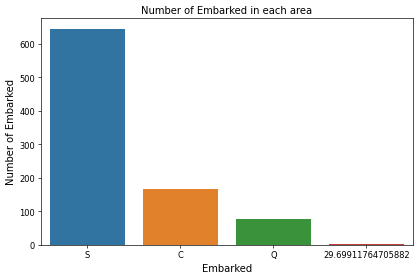

In [50]:
a = df["Embarked"].value_counts(sort=False)
fig=plt.figure(figsize=(8,5),dpi=60)
b = sns.barplot(x = a.index,y = a.values)
b.set_xlabel("Embarked", fontsize = 12)
b.set_ylabel("Number of Embarked", fontsize = 12)
b.set_title("Number of Embarked in each area")

Now lets put up a comparison and check how the data is related or interdependant on each other.

<AxesSubplot:xlabel='Survived'>

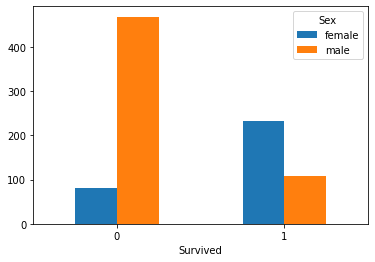

In [51]:
aa = pd.crosstab(df["Survived"],df["Sex"])
aa.plot.bar(rot=0)

<AxesSubplot:xlabel='Survived'>

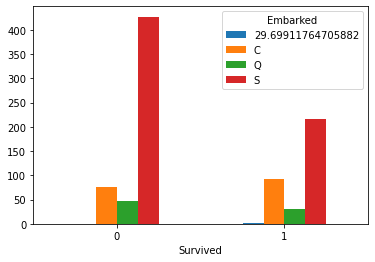

In [52]:
bb = pd.crosstab(df["Survived"],df["Embarked"])
bb.plot.bar(rot=0)

<AxesSubplot:xlabel='Survived'>

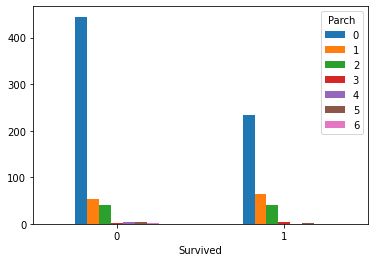

In [53]:
bb = pd.crosstab(df["Survived"],df["Parch"])
bb.plot.bar(rot=0)

In [82]:
# Pclass vs Survived
df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [83]:
# Sex vs Survived
df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [85]:
# Sibsp vs Survived
df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [86]:
# Parch vs Survived
df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Outlier Detection

In [92]:
from collections import Counter

In [93]:
def detect_outlier(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [94]:
df.loc[detect_outlier(df,["Age", "SibSp", "Parch", "Fare"])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2.000000,3,1,21.0750,S
16,0,3,male,2.000000,4,1,29.1250,Q
119,0,3,female,2.000000,4,2,31.2750,S
164,0,3,male,1.000000,4,1,39.6875,S
268,1,1,female,58.000000,0,1,153.4625,S
297,0,1,female,2.000000,1,2,151.5500,S
305,1,1,male,0.920000,1,2,151.5500,S
386,0,3,male,1.000000,5,2,46.9000,S
438,0,1,male,64.000000,1,4,263.0000,S
587,1,1,male,60.000000,1,1,79.2000,C


In [96]:
#drop outliers
df = df.drop(detect_outlier(df,["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop =True)

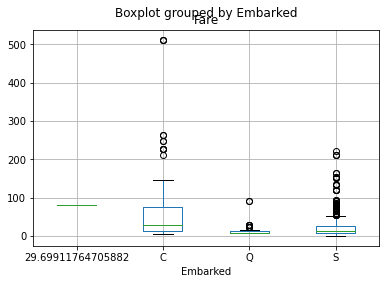

In [98]:
df.boxplot(column="Fare",by = "Embarked")
plt.show()

correlation between SibSp, Parch, Age, Fare, Survived

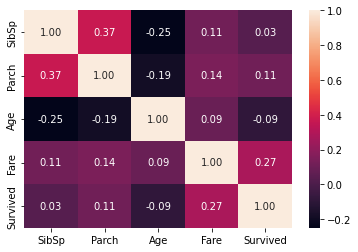

In [103]:
list1 =["SibSp", "Parch", "Age", "Fare", "Survived"]   
sns.heatmap(df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have correiation with survived feature (0.26).

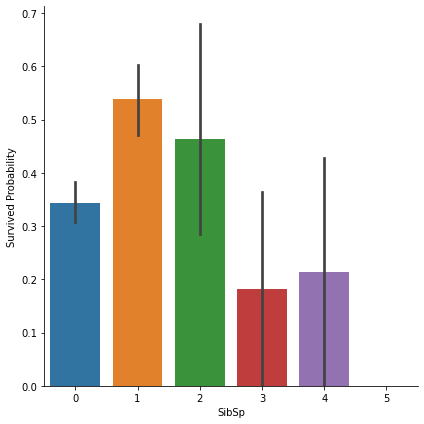

In [104]:
g = sns.catplot(x = "SibSp", y = "Survived", data = df, kind = "bar", height = 6)
g.set_ylabels("Survived Probability")
plt.show()

Having a lot of SibSp have less chance to survive.
If SibSp = 0 or 0r 2 passenger has more chance to survive.
We can consider a new feature describing these categories.

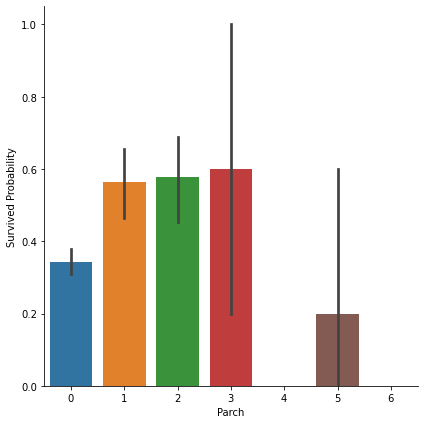

In [105]:
g = sns.factorplot(x = "Parch", y = "Survived", data = df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

SibSp and Parch can be used for new feature extraction with treshold = 3.
Small families have more chance to survive.
There is astandard deviation in survivel of passenger with parch = 3.

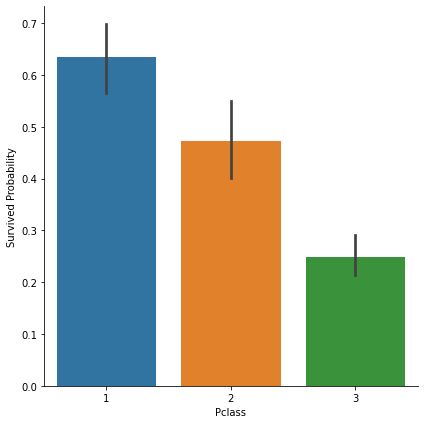

In [106]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

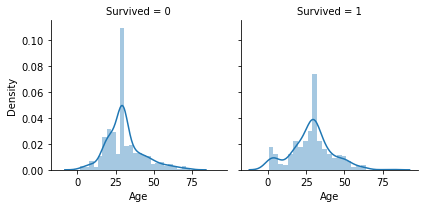

In [107]:
g = sns.FacetGrid(df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

Age <= 10 has a high survival rate,
Oldest passenger (80) survived,
large number of 20 years old did not survive,
Most passengers are in 15-25 age range,
Use age feature in tarining
Use age distribution for missing value of age feature.

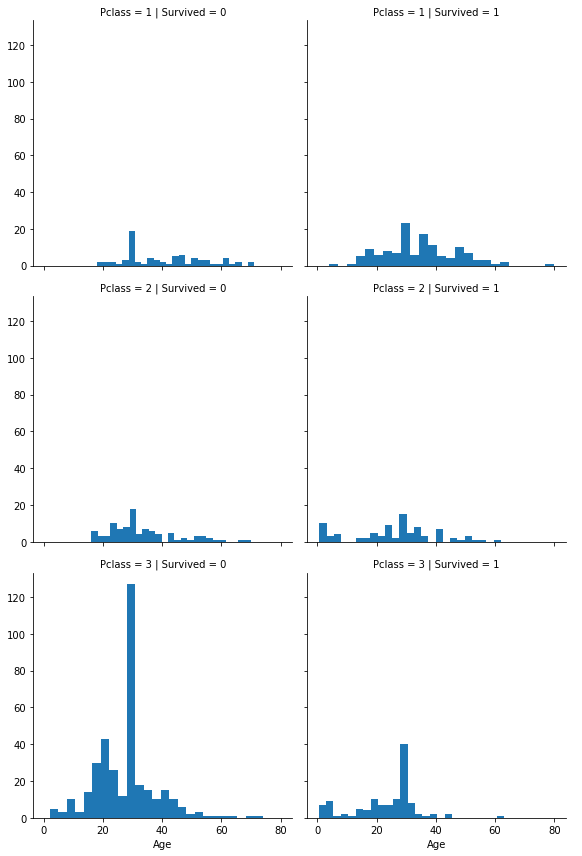

In [108]:
g = sns.FacetGrid(df, col = "Survived", row = "Pclass", height = 4)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

Pclass is important feature for model training.

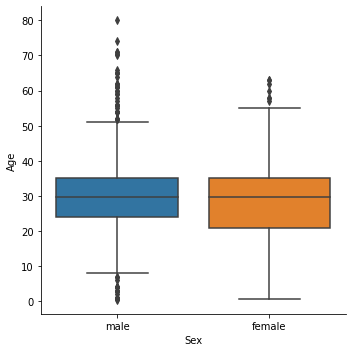

In [110]:
sns.factorplot(x= "Sex", y = "Age", data = df, kind = "box")
plt.show()

Sex is not informative for age prediction. Age distribution seems to be same.

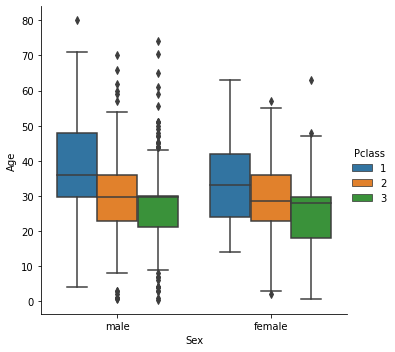

In [111]:
sns.factorplot(x= "Sex", y = "Age", hue = "Pclass", data = df, kind = "box")
plt.show()

First class passenger is older than second class and second class is older than third class.

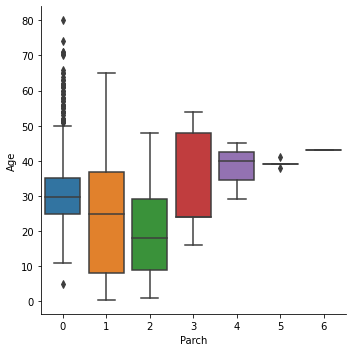

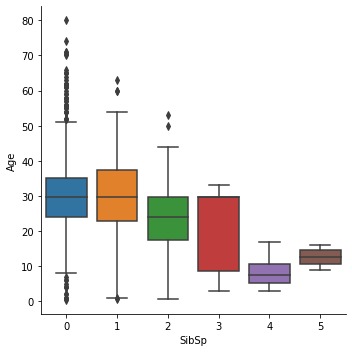

In [112]:
sns.factorplot(x= "Parch", y = "Age", data = df, kind = "box")
sns.factorplot(x= "SibSp", y = "Age", data = df, kind = "box")
plt.show()

In [113]:
df["Sex"] = [1 if i == "male" else 0 for i in df["Sex"]]

<AxesSubplot:>

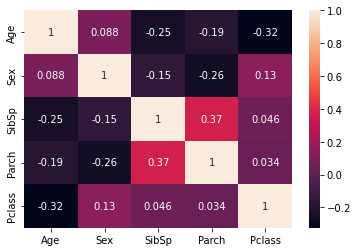

In [115]:
sns.heatmap(df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot = True)

Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [126]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [137]:
X = df.drop("Survived", axis=1) #here we are dropping the entire column with axis=1
y = df["Survived"]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=14)  # Split data into train and test sets

In [139]:
# See the length of the sets
len(X_train), len(y_train), len(X_test), len(y_test)

(649, 649, 217, 217)

In [140]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_train.shape, Y_train.shape, X_test.shape

((866, 7), (866,), (217, 7))

In [142]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
429,1,1,4.000000,0,2,81.8583,S
419,1,1,50.000000,1,0,55.9000,S
106,1,1,47.000000,0,0,52.0000,S
701,2,0,6.000000,0,1,33.0000,S
522,3,1,29.699118,0,0,14.5000,S
